In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, deque

#### Extract Top Odors

In [ ]:
df = pd.read_csv('PreprocessData/FrequentOdorExtraction/(Saturated)SoS_Full.csv', encoding='ISO-8859-1')
X = df.iloc[:, :2]  # 'cas_number' and 'SMILES'
Y = df.iloc[:, 2:]  # Odor descriptors

# Count number of 1s (positive samples) per descriptor
odor_freq = Y.sum().sort_values(ascending=False)

# Select top X most frequent descriptors
top_odors = odor_freq.head(138).index
Y_top = Y[top_odors]

# Keep only rows with at least one active label
mask = Y_top.sum(axis=1) > 0
Y_filtered = Y_top[mask]
X_filtered = X[mask]

print(f"Molecules with at least one of top 138 odors: {len(Y_filtered)}")


Molecules with at least one of top 138 odors: 4983


#### Save the file with top odors

In [ ]:
# Score each molecule by number of 1s
Y_filtered['label_count'] = Y_filtered.sum(axis=1)

# Sort by label_count to prioritize multi-label molecules
combined = pd.concat([X_filtered, Y_filtered], axis=1)
combined = combined.sort_values('label_count', ascending=False)

final_df = combined.drop(columns=['label_count'])
final_df.to_csv('(Saturated)SoS_Top138.csv', index=False)

print("Saved balanced dataset with top x descriptors.")

Saved balanced dataset with top x descriptors.


#### Visualize the distribution 

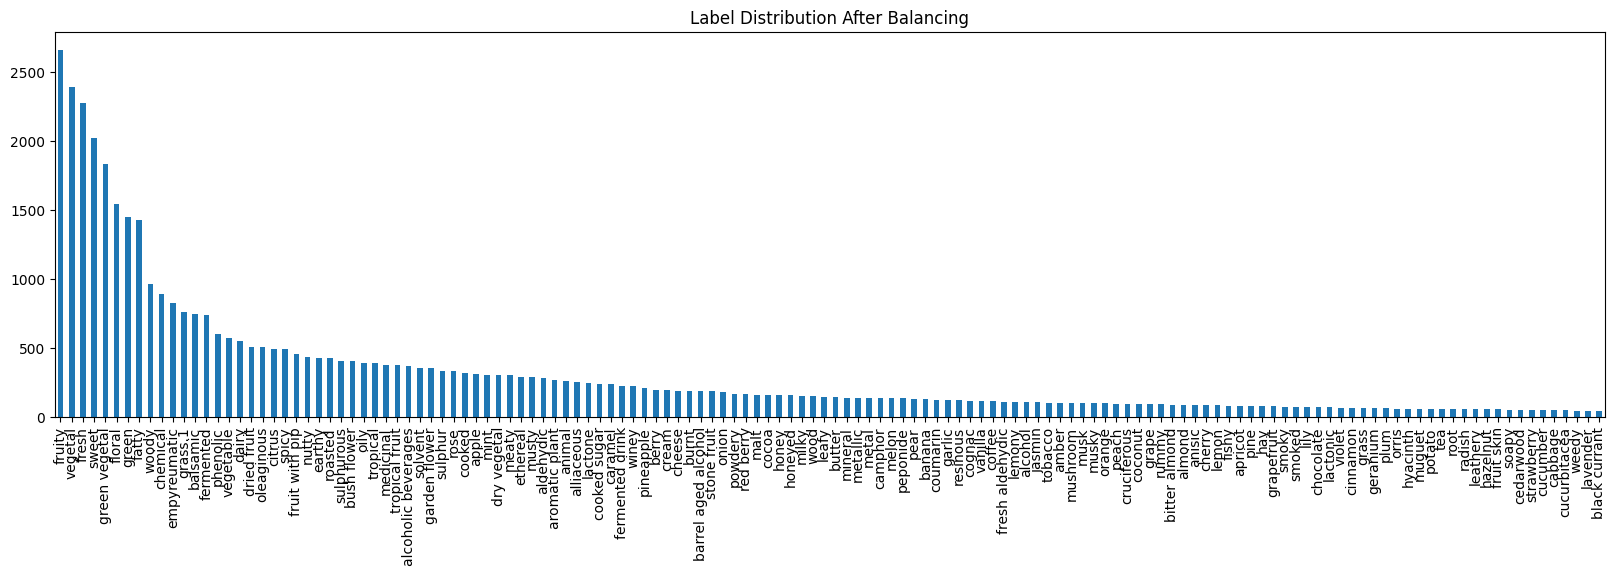

In [8]:
final_Y = final_df.iloc[:, 2:]
label_sums = final_Y.sum().sort_values(ascending=False)
label_sums.plot(kind='bar', figsize=(20, 5), title='Label Distribution After Balancing')
plt.show()

#### Get the data metrics for top odors

In [9]:
# Store original counts
original_descriptor_count = Y.shape[1]
original_molecule_count = Y.shape[0]

# Step 1: Select top 30 most frequent descriptors
odor_freq = Y.sum().sort_values(ascending=False)
top_descriptors = odor_freq.head(138).index
Y_top = Y[top_descriptors]

# Step 2: Filter molecules that have at least one of these descriptors
mask = Y_top.sum(axis=1) > 0
Y_filtered = Y_top[mask]
X_filtered = X[mask]

# Calculate removals
removed_descriptors = original_descriptor_count - Y_filtered.shape[1]
removed_molecules = original_molecule_count - Y_filtered.shape[0]

# Frequency stats for the filtered label matrix
freq_per_descriptor = Y_filtered.sum()

# Compute required statistics
max_freq = freq_per_descriptor.max()
min_freq = freq_per_descriptor.min()
mean_freq = freq_per_descriptor.mean()
median_freq = freq_per_descriptor.median()
std_freq = freq_per_descriptor.std()
q1 = freq_per_descriptor.quantile(0.25)
q3 = freq_per_descriptor.quantile(0.75)

# Print summary
print(f"Descriptors removed: {removed_descriptors}")
print(f"Molecules removed: {removed_molecules}")
print(f"Remaining descriptors: {Y_filtered.shape[1]}")
print(f"Remaining molecules: {Y_filtered.shape[0]}")
print("\nOdor Frequency Stats:")
print(f"Max Frequency: {max_freq}")
print(f"Min Frequency: {min_freq}")
print(f"Mean Frequency: {mean_freq:.2f}")
print(f"Median Frequency: {median_freq}")
print(f"Standard Deviation: {std_freq:.2f}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

Descriptors removed: 18
Molecules removed: 274
Remaining descriptors: 138
Remaining molecules: 4709

Odor Frequency Stats:
Max Frequency: 2661
Min Frequency: 43
Mean Frequency: 311.99
Median Frequency: 139.0
Standard Deviation: 460.19
Q1 (25th percentile): 81.25
Q3 (75th percentile): 333.5
